In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [30]:
factory = pd.read_csv('Factory_Salary.csv')

In [31]:
factory.head(5)

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0


In [32]:
factory.columns

Index(['Date', 'Profession', 'Rank', 'Equipment', 'Insalubrity',
       'Size_Production', 'Salary'],
      dtype='object')

In [33]:
factory.describe()

,Rank,Insalubrity,Size_Production,Salary
count,264.000000,264.000000,264.000000,264.000000
mean,4.909091,15.681818,988.333333,21030.461230
std,1.313600,6.682726,231.372715,4323.920780
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,11.000000,805.000000,17830.000000
50%,5.000000,18.000000,985.000000,20350.000000
75%,6.000000,22.000000,1185.000000,23818.014706
max,7.000000,22.000000,1400.000000,33157.058824


In [34]:
factory.shape

(264, 7)

In [35]:
factory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             264 non-null    object 
 1   Profession       264 non-null    object 
 2   Rank             264 non-null    int64  
 3   Equipment        264 non-null    object 
 4   Insalubrity      264 non-null    int64  
 5   Size_Production  264 non-null    int64  
 6   Salary           264 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.6+ KB


In [36]:
factory.isna().sum()

Date               0
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

In [37]:
## i have devided into numeric and obj data
## then done standardisation on num features
## label encoding on obj features
## concat both the datasets:


num = factory.select_dtypes(include = np.number)
obj = factory.select_dtypes(include = np.object)

from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
num2 = feature_scaler.fit_transform(num)
num2 = pd.DataFrame(num2,columns= num.columns)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

obj2 = obj.apply(le.fit_transform)
obj2.head(2)

factory2 = pd.concat([num2,obj2],axis =1)
print(factory.shape)

print(factory2.shape)

(264, 7)
(264, 7)


/var/folders/8r/r02ft4g96gng27p7_46j1l9h0000gn/T/ipykernel_49011/2728474719.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj = factory.select_dtypes(include = np.object)


In [44]:
factory2.head(5)

,Rank,Insalubrity,Size_Production,Salary,Date,Profession,Equipment
0,1.594763,0.947245,-1.768181,1.156130,0,2,2
1,0.832050,0.947245,-1.768181,0.451729,0,2,2
2,0.069338,0.947245,-1.768181,-0.157670,0,2,2
3,0.069338,0.947245,-1.768181,-0.157670,0,2,2
4,-0.693375,0.947245,-1.768181,-0.681337,0,2,2


In [45]:
factory2.columns

Index(['Rank', 'Insalubrity', 'Size_Production', 'Salary', 'Date',
       'Profession', 'Equipment'],
      dtype='object')

In [49]:
x = factory2[['Rank', 'Insalubrity', 'Size_Production','Profession', 'Equipment']]
y = factory2['Salary']

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
#from sklearn.feature_selection import RFE

#rfe = RFE(DecisionTreeRegressor(),n_features_to_select=3)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [54]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
pred = model.predict(x_test)

In [57]:
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.013284184860938289
0.98374132672298


In [58]:
## Build decesion tree regressor considering "salary" as target and the "pro,rank,equip, insa,size_produc" as my 
#features 
## and validate your model by caluctaing  mean squared error :

## EDA code:
## how to find the distribution of target variable as"Salary".. by histogram:
#plt.hist(factory['Salary'])

## how to find the distribution of numeric variable by box plot, violin plot...

#sns.boxplot(factory['Insalubrity'])
## label encoding:


## what model you build :


## what is your mean absolute error value :




{'whiskers': [<matplotlib.lines.Line2D at 0x7ff150665610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff150665d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff150665280>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1506ce490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1506ce820>],
 'means': []}

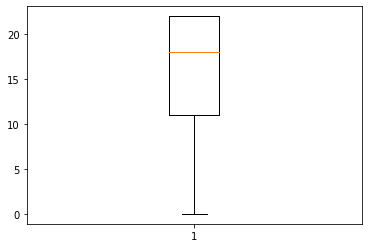

In [ ]:
plt.boxplot(factory['Insalubrity'])
## label encoding: